In [3]:
!pip install -q kaggle
!cp kaggle.json ~/.kaggle/
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

cp: cannot stat 'kaggle.json': No such file or directory


Saving kaggle.json to kaggle.json
100% 1.08G/1.08G [00:36<00:00, 34.4MB/s]
100% 1.08G/1.08G [00:36<00:00, 32.1MB/s]


In [4]:
!unzip the-simpsons-characters-dataset.zip
!rm -rf the-simpsons-characters-dataset.zip
!rm -rf simpsons_dataset/simpsons_dataset

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_datas

In [5]:
#kaggle pars


import shutil
import os



!rm -rf testset
os.mkdir("testset")
test_data_name = os.listdir("kaggle_simpson_testset/kaggle_simpson_testset")
for i in range(len(test_data_name)):
  name = test_data_name[i]
  dst = "testset/"+ name[:name.rfind('_')]
  path = "kaggle_simpson_testset/kaggle_simpson_testset/"+name

  if not os.path.exists(dst):
    os.mkdir(dst)
  shutil.copyfile(path, dst+"/"+name)


content = os.listdir('simpsons_dataset')
content.sort()

for i in content:
    dst = "testset/"+i
    src = "simpsons_dataset/"+i
    file_name = os.listdir(src)[0]
    src =src +  "/" + os.listdir(src)[0]

    print(src)
    if not os.path.exists(dst):
      os.mkdir(dst)
      dst = dst + "/" + file_name
      shutil.copyfile(src,dst)

simpsons_dataset/abraham_grampa_simpson/pic_0876.jpg
simpsons_dataset/agnes_skinner/pic_0033.jpg
simpsons_dataset/apu_nahasapeemapetilon/pic_0535.jpg
simpsons_dataset/barney_gumble/pic_0088.jpg
simpsons_dataset/bart_simpson/pic_0876.jpg
simpsons_dataset/carl_carlson/pic_0088.jpg
simpsons_dataset/charles_montgomery_burns/pic_0876.jpg
simpsons_dataset/chief_wiggum/pic_0876.jpg
simpsons_dataset/cletus_spuckler/pic_0033.jpg
simpsons_dataset/comic_book_guy/pic_0162.jpg
simpsons_dataset/disco_stu/pic_0003.jpg
simpsons_dataset/edna_krabappel/pic_0162.jpg
simpsons_dataset/fat_tony/pic_0017.jpg
simpsons_dataset/gil/pic_0017.jpg
simpsons_dataset/groundskeeper_willie/pic_0088.jpg
simpsons_dataset/homer_simpson/pic_0876.jpg
simpsons_dataset/kent_brockman/pic_0162.jpg
simpsons_dataset/krusty_the_clown/pic_0876.jpg
simpsons_dataset/lenny_leonard/pic_0162.jpg
simpsons_dataset/lionel_hutz/pic_0001.jpg
simpsons_dataset/lisa_simpson/pic_0876.jpg
simpsons_dataset/maggie_simpson/pic_0088.jpg
simpsons_data

In [6]:
!pip install caer

In [7]:
!pip install canaro

In [8]:
import matplotlib.pyplot as plt
import os
import gc

import torch
import cv2 as cv
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import caer
import canaro

In [9]:
img_size=(180,180)
channels = 1
char_path= 'simpsons_dataset'

In [10]:
char_dict={}
for char in os.listdir(char_path):
    char_dict[char]=len(os.listdir(os.path.join(char_path,char)))
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('gil', 27),
 ('fat_tony', 27),
 ('miss_hoover'

In [11]:
chars = []
cnt=0
for i in char_dict:
    chars.append(i[0])
    cnt+=1
    if cnt>=4:
        break
chars

['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson']

In [12]:
#Создание тренировочных данных
train=caer.preprocess_from_dir(char_path, chars, channels=channels, IMG_SIZE=img_size, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.023129701614379883s
[INFO] At 1000 files
[INFO] 1454 files found in 0.00665593147277832s
[INFO] At 1000 files
[INFO] 1452 files found in 0.003316164016723633s
[INFO] At 1000 files
[INFO] 1354 files found in 0.002927064895629883s
----------------------------------------------
[INFO] 6506 files preprocessed! Took 0m 17s


<function matplotlib.pyplot.show(close=None, block=None)>

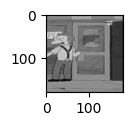

In [13]:
plt.figure(figsize=(1,1))
plt.imshow(train[0][0], cmap='gray')
plt.show

In [14]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=img_size)

In [15]:
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(chars))

In [16]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=0.1)
# print(x_train)
# print(x_train.shape())
# print(y_train.shape())

In [24]:
# # Создаем модель нейронной сети
# model = Sequential()

# # Добавляем сверточный слой
# model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(180, 180, 1)))

# # Добавляем слой подвыборки
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

# # Добавляем второй сверточный слой
# model.add(Conv2D(64, (3, 3), activation='relu'))

# # Добавляем второй слой подвыборки
# model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

# # Преобразуем двумерные данные в одномерные
# model.add(Flatten())

# # Добавляем полносвязный слой
# model.add(Dense(64, activation='relu'))

# # Добавляем выходной слой
# model.add(Dense(3, activation='softmax'))

# # optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.00001, decay=1e-7, momentum=0.7, nesterov=True)

# # Компилируем модель
# # model.compile(optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()
class ConvNN(tf.keras.Model):
    def __init__(self):
        super(ConvNN, self).__init__()

 #   def build(self, input_shape):
        self.conv1 = tf.keras.layers.Conv2D(64,3,activation='relu', input_shape=(None, 180, 180,1))
        # self.max1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
        self.conv2 = tf.keras.layers.Conv2D(32,3,activation='relu')
        # self.max2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))
        self.flatten = tf.keras.layers.Flatten()
        self.d1 = tf.keras.layers.Dense(64, activation='relu')
        self.d2 = tf.keras.layers.Dense(4, activation='softmax')
        super(ConvNN, self).build((None, 180, 180, 1))

    def call(self,x):
        x = self.conv1(x)
        # x = self.max1(x)
        x = self.conv2(x)
        # x = self.max2(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)
        return x

model = ConvNN()
#model.build((None, 180, 180, 1))
optimiser = Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "conv_nn_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           multiple                  640       
                                                                 
 conv2d_5 (Conv2D)           multiple                  18464     
                                                                 
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_4 (Dense)             multiple                  63438912  
                                                                 
 dense_5 (Dense)             multiple                  260       
                                                                 
Total params: 63458276 (242.07 MB)
Trainable params: 63458276 (242.07 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# gc.collect()
BATCH_SIZE=32
EPOCHS=5

In [26]:
datagen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1
                             , zoom_range=0.2)
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

callbacks_list=[LearningRateScheduler(canaro.lr_schedule)]

# optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.00001, decay=1e-7, momentum=0.7, nesterov=True)

training=model.fit(train_gen, steps_per_epoch=len(x_train)//BATCH_SIZE, epochs=EPOCHS, validation_data=(x_val, y_val),
                   validation_steps=len(y_val)//BATCH_SIZE, callbacks=callbacks_list)
# with open('model.pkl', 'wb') as file:
#     pickle.dump(model, file)

Epoch 1/5
182/182 [==============================] - 22s 114ms/step - loss: 6.5416 - accuracy: 0.3317 - val_loss: 1.3535 - val_accuracy: 0.3696 - lr: 0.0100
Epoch 2/5
182/182 [==============================] - 20s 108ms/step - loss: 1.3662 - accuracy: 0.3427 - val_loss: 1.3535 - val_accuracy: 0.3696 - lr: 0.0100
Epoch 3/5
182/182 [==============================] - 21s 114ms/step - loss: 1.3660 - accuracy: 0.3423 - val_loss: 1.3555 - val_accuracy: 0.3696 - lr: 0.0100
Epoch 4/5
182/182 [==============================] - 22s 123ms/step - loss: 1.3665 - accuracy: 0.3418 - val_loss: 1.3547 - val_accuracy: 0.3696 - lr: 0.0100
Epoch 5/5
182/182 [==============================] - 20s 108ms/step - loss: 1.3657 - accuracy: 0.3430 - val_loss: 1.3527 - val_accuracy: 0.3696 - lr: 0.0100


In [27]:
val_datagen = canaro.generators.imageDataGenerator()
val_gen = val_datagen.flow(x_val, y_val, batch_size=BATCH_SIZE)
model.evaluate(val_gen)

21/21 [==============================] - 3s 118ms/step - loss: 1.3527 - accuracy: 0.3696


[1.3527476787567139, 0.36963191628456116]

<function matplotlib.pyplot.show(close=None, block=None)>

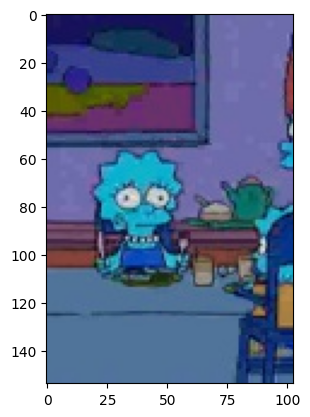

In [31]:
img1 = cv.imread('kaggle_simpson_testset/kaggle_simpson_testset/lisa_simpson_15.jpg')
# image = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
# image = cv.resize(image, (180,180))

def prepare(image, img_size):
    image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
    # print(image)
    plt.imshow(image)
    image = cv.resize(image, img_size, interpolation=1)
    image = (image/10).astype('float16')
    image = caer.reshape(image, img_size, 1)

    return image
#plt.figure(figsize=(1,1))
plt.imshow(img1)
plt.show

1/1 [==============================] - 0s 19ms/step


array([[0.34876165, 0.21729726, 0.23194556, 0.20199555]], dtype=float32)

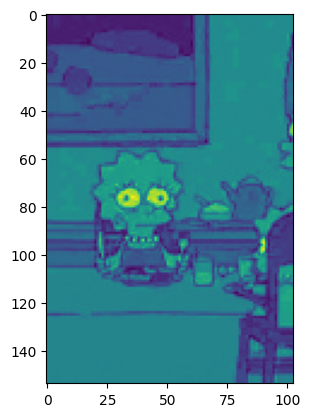

In [32]:
img_size = (180,180)
predictions = model.predict(prepare(img1, img_size))
predictions

In [33]:
print(chars[np.argmax(predictions)])

homer_simpson
